Classification Report:
              precision    recall  f1-score   support

          no       0.56      0.60      0.58        15
         yes       0.57      0.53      0.55        15

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.57        30
weighted avg       0.57      0.57      0.57        30



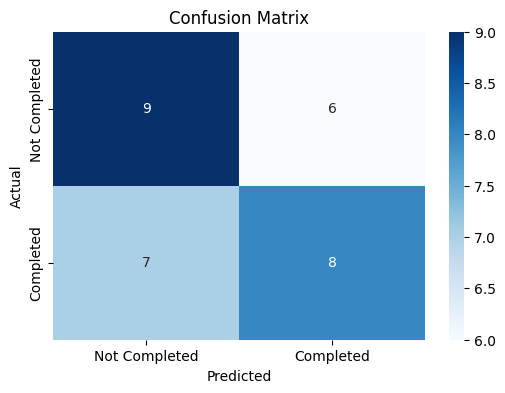

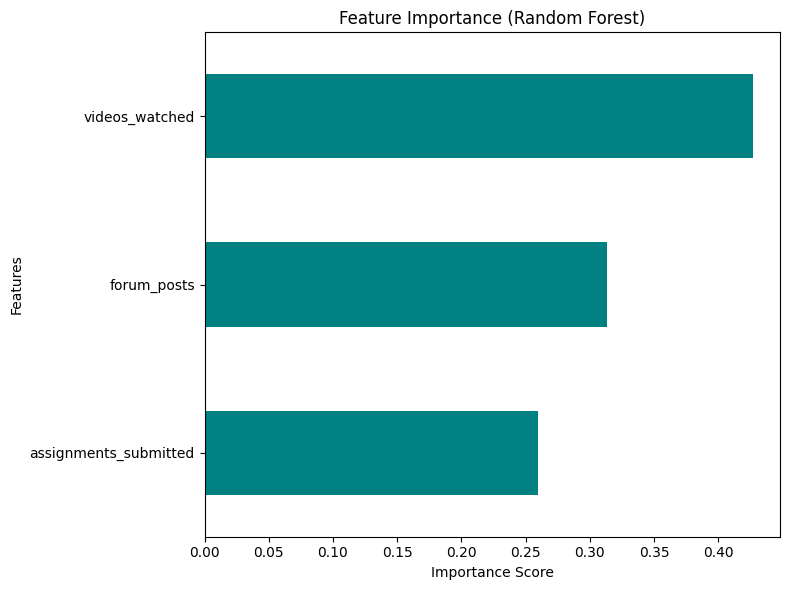

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

#  Load the dataset
df = pd.read_csv('online_learning.csv')

#  Basic preprocessing
df.dropna(inplace=True)

#  Define features and target
X = df.drop(columns=['completed'])  # Features
y = df['completed']                # Target

#  Standardize numerical features
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

#  Train Random Forest Classifier
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

#  Make Predictions
y_pred = clf.predict(X_test)

#  Evaluate the Model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# --- 📊 Visualization 1: Confusion Matrix Heatmap ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Completed', 'Completed'], yticklabels=['Not Completed', 'Completed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- 📈 Visualization 2: Feature Importance ---
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=True)

plt.figure(figsize=(8, 6))
feature_importances.plot(kind='barh', color='teal')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
